In [8]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import random
import time
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import pickle
from tensorflow.keras import backend as K

In [4]:
NAME = "handwritten_digits_MNIST_CNN"

#  accesing_to_dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


<Figure size 432x288 with 0 Axes>

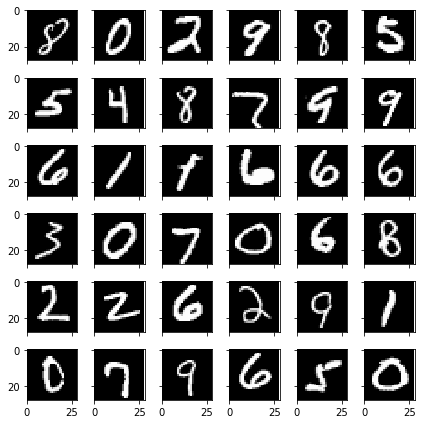

In [5]:
ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS * ROWS)

sample_images = x_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS, ROWS,
                         figsize=(ROWS, ROWS),
                         sharex=True, sharey=True)

for i in range(ROWS * ROWS):
    subplot_row = i // ROWS
    subplot_col = i % ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i, :], (28, 28))
    ax.imshow(plottable_image, cmap='gray')

    ax.set_xbound([0, 28])

plt.tight_layout()
plt.show()

In [6]:
# define CNN
batch_size = 128
num_classes = 10
epochs = 10

In [9]:
# input image dimensions

img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))

x_train shape: (60000, 28, 28, 1)
Training samples: 60000
Test samples: 10000


In [10]:
# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

start_time = time.time()


In [14]:
# Build Model, AdamOptimiser to train network used, crossentropy as os function
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


In [15]:
# start training
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format((elapsed_time)))

model.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
53632/60000 [=========================>....] - ETA: 19s - loss: 0.2468 - accuracy: 0.9250

KeyboardInterrupt: 

In [ ]:
# Predict using CPU, send the entire dataset.
# Set the desired TensorFlow output level for this example
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

model.save('my_CNN_MNIST_v2_model.h5')

score = model.evaluate(x_train, y_train, verbose=0)
#print('Test loss: {}'.format(score[0]))
print('Trained accuracy: {}'.format(score[1]))